In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")


In [2]:
sc_edits = pd.read_csv('../ie-sc-edits.csv')

In [3]:
sc_edits.head()

,key,new_value,old_value,id,new_version,old_version,datetime,username,uid,changeset_id
0,building:levels,2,NaN,w231401171,3,2.0,2017-03-16T20:57:28Z,Vincent de Phily,364916,46910380
1,roof:levels,0,NaN,w231401171,3,2.0,2017-03-16T20:57:28Z,Vincent de Phily,364916,46910380
2,name,Eglinton Street,NaN,w4578731,5,4.0,2017-03-27T22:14:09Z,ajh0912,5569016,47214025
3,noname,yes,NaN,w200854951,3,2.0,2017-03-27T22:14:40Z,ajh0912,5569016,47214038
4,noname,yes,NaN,w200854949,2,1.0,2017-03-27T22:14:51Z,ajh0912,5569016,47214043


In [4]:
sc_edits['datetime'] = pd.to_datetime(sc_edits.datetime)

In [5]:
monthly = sc_edits.resample('M', on='datetime').agg({'id': 'count', 'username': 'nunique'}).rename(columns = {'id' : 'edit_count' , 'username' : 'user_count'})
monthly

,edit_count,user_count
datetime,,
2017-03-31 00:00:00+00:00,48,4
2017-04-30 00:00:00+00:00,391,12
2017-05-31 00:00:00+00:00,1376,23
2017-06-30 00:00:00+00:00,1048,13
2017-07-31 00:00:00+00:00,297,12
2017-08-31 00:00:00+00:00,1170,6
2017-09-30 00:00:00+00:00,934,10
2017-10-31 00:00:00+00:00,669,5
2017-11-30 00:00:00+00:00,577,9


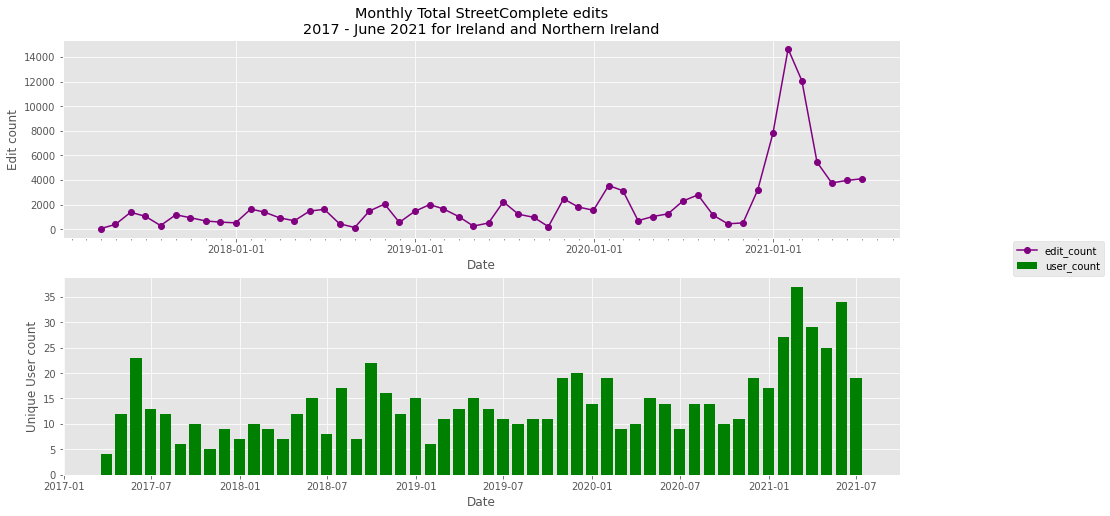

In [6]:
fig, ax = plt.subplots(figsize=(15,8), nrows=2, ncols=1)

# Add x-axis and y-axis
ax[0].plot(monthly.index.values,
       monthly['edit_count'],
        marker='o',
       color='purple')

widths = [d.days for d in np.diff(monthly.index.tolist())]
ax[1].bar(monthly.index.values,
       monthly['user_count'],
       color='green'
          , width=0.8*widths[0]
           )

# Set title and labels for axes
ax[0].set(xlabel="Date",
       ylabel="Edit count",
       title="Monthly Total StreetComplete edits\n2017 - June 2021 for Ireland and Northern Ireland")

ax[1].set(xlabel="Date",
       ylabel="Unique User count",
       )

fig.legend(monthly.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5))

# date formating
ax[0].xaxis.set_major_locator(mdates.YearLocator())
ax[0].xaxis.set_minor_locator(mdates.MonthLocator())

plt.show()

In [7]:
monthly.to_csv('../output/monthly-contributor.csv')